In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [5]:
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [6]:
df.shape

(48168, 7)

In [7]:
df.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [10]:
 for column in df.columns:
        print("{} has {:.2f}% null values: ".format(column,(df[column].isnull().sum()/len(df))*100))
        print("_"*100)

Entity has 0.00% null values: 
____________________________________________________________________________________________________
Code has 4.18% null values: 
____________________________________________________________________________________________________
Year has 0.00% null values: 
____________________________________________________________________________________________________
Per capita plastic waste (kg/person/day) has 99.61% null values: 
____________________________________________________________________________________________________
GDP per capita, PPP (constant 2011 international $) has 86.70% null values: 
____________________________________________________________________________________________________
Total population (Gapminder, HYDE & UN) has 2.67% null values: 
____________________________________________________________________________________________________
Continent has 99.41% null values: 
_______________________________________________________________

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [14]:
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [15]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [17]:
incomplete_data=df[(df['Total Population'].isna())& (df['GDP per capita in PPP'].isna())].index
df.drop(incomplete_data, inplace=True)


In [18]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [19]:
df.shape

(48113, 7)

In [21]:
df_2010 = df[df['Year']==2010]
df_2010 = df_2010.drop(columns='Continent')

In [22]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [27]:
df_2015 = df[df['Year']==2015]
df_2010['Continent'] = df_2015['Continent'].values

In [28]:
df_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [29]:
missing_data = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_data, inplace = True)

In [30]:
df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]
waste_gen = df_2010.reset_index().drop('index',axis=1)

In [31]:
waste_gen.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


In [33]:
df2=pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [34]:
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [40]:
df2.rename(columns={'Per capita mismanaged plastic waste':'mismanaged waste per person',
                   'GDP per capita, PPP (Constant 2011 international $)': 'GDP per capita, PPP',
                   'Total population (Gapminder, HYDE & UN)': 'Total population'}, inplace = True)

In [41]:
df2.head()

,Entity,Code,Year,mismanaged waste per person,"GDP per capita, PPP (constant 2011 international $)",Total population
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0


df.head()

In [43]:
df2_2010 = df2[df2.Year == 2010 ]
df2_2010.head()

,Entity,Code,Year,mismanaged waste per person,"GDP per capita, PPP (constant 2011 international $)",Total population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [47]:
df2_2010 = df2_2010[df2_2010['mismanaged waste per person'].isna()!= True]

waste_management = df2_2010.reset_index().drop('index', axis = 1)

In [48]:
waste_management.head()

,Entity,Code,Year,mismanaged waste per person,"GDP per capita, PPP (constant 2011 international $)",Total population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [49]:
plastic_waste_data = pd.merge(waste_gen, waste_management, how='inner')

In [50]:
plastic_waste_data.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,mismanaged waste per person,"GDP per capita, PPP (constant 2011 international $)",Total population
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051,19212.720131,88000.0


In [51]:
plastic_waste_data.columns.tolist()

['Entity',
 'Code',
 'Year',
 'Waste per person(kg/day)',
 'GDP per capita in PPP',
 'Total Population',
 'Continent',
 'mismanaged waste per person',
 'GDP per capita, PPP (constant 2011 international $)',
 'Total population']

In [56]:
col_names = ['Entity','Code','Year','Waste per person(kg/day)','mismanaged waste per person',
            'GDP per capita in PPP','Total Population','Continent']

In [57]:
plastic_waste_data = plastic_waste_data[col_names]

In [58]:
plastic_waste_data.iloc[:,3:5] = np.round(plastic_waste_data[['Waste per person(kg/day)','mismanaged waste per person']], decimals=2)

In [60]:
plastic_waste_data['Total Population'] = plastic_waste_data['Total Population'].astype(int)

In [61]:
plastic_waste_data['Total waste(kgs/year)']= ((plastic_waste_data['Waste per person(kg/day)'] * 
                                              plastic_waste_data['Total Population'])*365)
plastic_waste_data['Total waste mismanaged(kgs/year)'] = ((plastic_waste_data['mismanaged waste per person']*
                                                          plastic_waste_data['Total Population'])*365)

In [62]:
plastic_waste_data.head()

,Entity,Code,Year,Waste per person(kg/day),mismanaged waste per person,GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


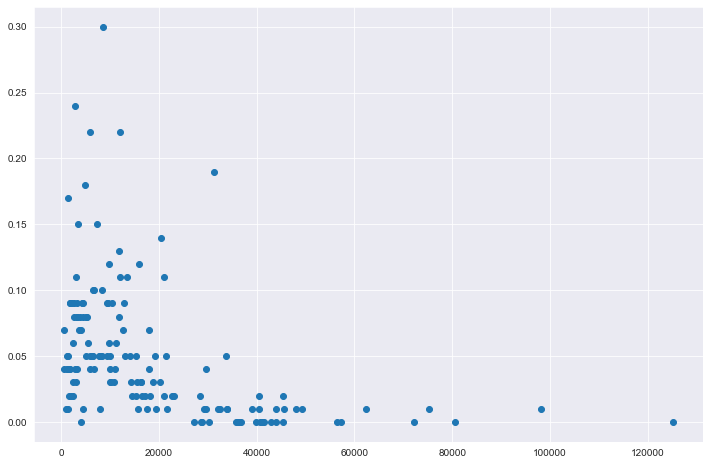

In [64]:
plt.figure(1, figsize=(12,8))
plt.scatter(plastic_waste_data['GDP per capita in PPP'], plastic_waste_data['mismanaged waste per person'])

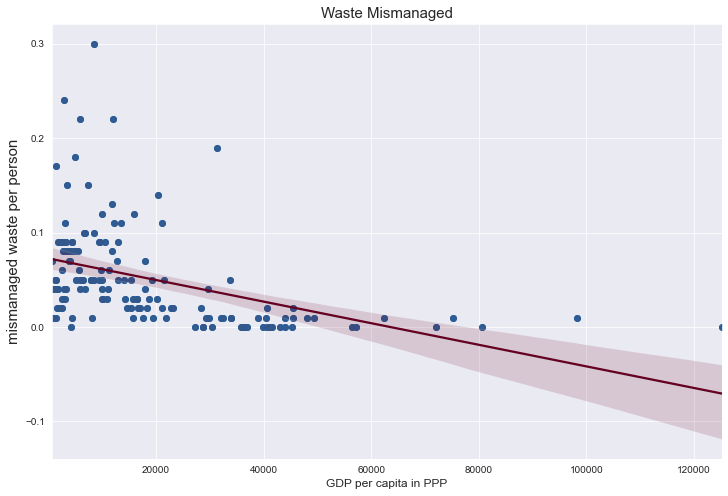

In [71]:
plt.figure(1, figsize=(12,8))
plt.scatter(plastic_waste_data['GDP per capita in PPP'], plastic_waste_data['mismanaged waste per person'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', loc='center', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='mismanaged waste per person', data=plastic_waste_data,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()


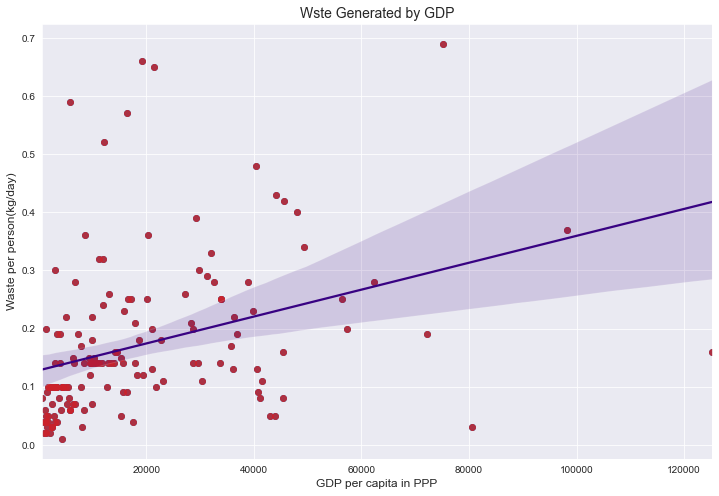

In [72]:
plt.figure(2, figsize=(12,8))
plt.scatter(plastic_waste_data['GDP per capita in PPP'], plastic_waste_data['Waste per person(kg/day)'])
plt.title('Wste Generated by GDP', loc = 'center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc = 'center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize = 12)

sns.regplot(x=plastic_waste_data['GDP per capita in PPP'], y = plastic_waste_data['Waste per person(kg/day)'], scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})
plt.show()